<a href="https://colab.research.google.com/github/ananthomprakash/DS-github/blob/master/Big_Mart_Sales_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # to perform numerical operations
import pandas as pd # for data manipulations and data agrregations
import matplotlib.pyplot as plt
import seaborn as sns 

# for visualization
from sklearn.linear_model import LinearRegression #  To Build regression algo
import statsmodels.api as sm # to build the statstical models
from sklearn.model_selection import train_test_split # to divide the data into train and test
import sklearn.metrics

In [64]:
from google.colab import drive
drive.mount('/content/DataSets')

Drive already mounted at /content/DataSets; to attempt to forcibly remount, call drive.mount("/content/DataSets", force_remount=True).


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':"1_iq1JMW3C9BIAsKvOaPMycVu26RW5hlZ"})
downloaded.GetContentFile('train.csv')

In [0]:
market = pd.read_csv('train.csv')

In [69]:
market.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [70]:
market1=market[(market["Item_Type"]=="Baking Goods" ) & (market["Outlet_Type"]=="Supermarket Type1")]
market1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
48,FDL12,15.850,Regular,0.121633,Baking Goods,60.6220,OUT046,1997,Small,Tier 1,Supermarket Type1,2576.6460
71,FDL12,15.850,Regular,0.121532,Baking Goods,59.2220,OUT013,1987,High,Tier 3,Supermarket Type1,599.2200
106,FDA47,10.500,Regular,0.116577,Baking Goods,163.1210,OUT013,1987,High,Tier 3,Supermarket Type1,1794.3310
107,FDG12,6.635,Regular,0.000000,Baking Goods,121.3098,OUT045,2002,NaN,Tier 2,Supermarket Type1,2530.7058
179,FDO24,11.100,Low Fat,0.176573,Baking Goods,157.4604,OUT045,2002,NaN,Tier 2,Supermarket Type1,3010.7476


In [71]:
market1.shape

(426, 12)

In [72]:
market1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 48 to 8519
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            426 non-null    object 
 1   Item_Weight                426 non-null    float64
 2   Item_Fat_Content           426 non-null    object 
 3   Item_Visibility            426 non-null    float64
 4   Item_Type                  426 non-null    object 
 5   Item_MRP                   426 non-null    float64
 6   Outlet_Identifier          426 non-null    object 
 7   Outlet_Establishment_Year  426 non-null    int64  
 8   Outlet_Size                283 non-null    object 
 9   Outlet_Location_Type       426 non-null    object 
 10  Outlet_Type                426 non-null    object 
 11  Item_Outlet_Sales          426 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 43.3+ KB


In [73]:
for i in market1.columns:
    print(i," ",market1[i].nunique(),market1[i].dtypes)
    if market1[i].dtypes =='object':
        if((market1[i].nunique() > 10) | (market1[i].nunique()==1)):
            market1.drop(i,axis=1,inplace=True)
     

Item_Identifier   118 object
Item_Weight   94 float64
Item_Fat_Content   5 object
Item_Visibility   398 float64
Item_Type   1 object
Item_MRP   411 float64
Outlet_Identifier   6 object
Outlet_Establishment_Year   6 int64
Outlet_Size   3 object
Outlet_Location_Type   3 object
Outlet_Type   1 object
Item_Outlet_Sales   366 float64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [74]:
list(market1.columns)

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Item_Outlet_Sales']

In [0]:
market1=market1.fillna(method="ffill")

In [76]:
market1.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Item_Outlet_Sales            0
dtype: int64

In [77]:
market2=pd.get_dummies(market1,drop_first=True)
print(market2.shape)
list(market2.columns)

(426, 18)


['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales',
 'Item_Fat_Content_Low Fat',
 'Item_Fat_Content_Regular',
 'Item_Fat_Content_low fat',
 'Item_Fat_Content_reg',
 'Outlet_Identifier_OUT017',
 'Outlet_Identifier_OUT035',
 'Outlet_Identifier_OUT045',
 'Outlet_Identifier_OUT046',
 'Outlet_Identifier_OUT049',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3']

In [78]:
market2.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,426.0,12.290869,4.802144,4.8800,8.235000,11.650000,15.825000,20.850000
Item_Visibility,426.0,0.061530,0.041943,0.0000,0.030202,0.055739,0.082419,0.186236
Item_MRP,426.0,125.975262,58.957086,35.0874,83.167100,110.205700,171.742200,265.556800
Outlet_Establishment_Year,426.0,1999.248826,6.470135,1987.0000,1997.000000,1999.000000,2004.000000,2007.000000
Item_Outlet_Sales,426.0,2102.021249,1431.337598,126.5020,1006.689600,1764.702900,2868.099950,7931.675400
Item_Fat_Content_Low Fat,426.0,0.448357,0.497911,0.0000,0.000000,0.000000,1.000000,1.000000
Item_Fat_Content_Regular,426.0,0.490610,0.500500,0.0000,0.000000,0.000000,1.000000,1.000000
Item_Fat_Content_low fat,426.0,0.009390,0.096558,0.0000,0.000000,0.000000,0.000000,1.000000
Item_Fat_Content_reg,426.0,0.021127,0.143976,0.0000,0.000000,0.000000,0.000000,1.000000
Outlet_Identifier_OUT017,426.0,0.171362,0.377268,0.0000,0.000000,0.000000,0.000000,1.000000


In [0]:
def outlier_cal(data):
    col=list(data.columns)
    for i in col:
        if(data[i].nunique()> 2):
            iqr=data[i].quantile(0.75)-data[i].quantile(0.25)
            lo=data[i].quantile(0.25)-(1.5*iqr)
            uo=data[i].quantile(0.75)+(1.5*iqr)
            data[i]=np.where(data[i]>uo,uo,data[i])
            data[i]=np.where(data[i]<lo,lo,data[i])
    return data

In [80]:
market3=outlier_cal(data=market2)
market3.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,426.0,12.290869,4.802144,4.8800,8.235000,11.650000,15.825000,20.850000
Item_Visibility,426.0,0.061041,0.040645,0.0000,0.030202,0.055739,0.082419,0.160746
Item_MRP,426.0,125.975262,58.957086,35.0874,83.167100,110.205700,171.742200,265.556800
Outlet_Establishment_Year,426.0,1999.248826,6.470135,1987.0000,1997.000000,1999.000000,2004.000000,2007.000000
Item_Outlet_Sales,426.0,2082.203345,1372.174578,126.5020,1006.689600,1764.702900,2868.099950,5660.215475
Item_Fat_Content_Low Fat,426.0,0.448357,0.497911,0.0000,0.000000,0.000000,1.000000,1.000000
Item_Fat_Content_Regular,426.0,0.490610,0.500500,0.0000,0.000000,0.000000,1.000000,1.000000
Item_Fat_Content_low fat,426.0,0.009390,0.096558,0.0000,0.000000,0.000000,0.000000,1.000000
Item_Fat_Content_reg,426.0,0.021127,0.143976,0.0000,0.000000,0.000000,0.000000,1.000000
Outlet_Identifier_OUT017,426.0,0.171362,0.377268,0.0000,0.000000,0.000000,0.000000,1.000000


In [0]:
from statsmodels.graphics.gofplots import qqplot

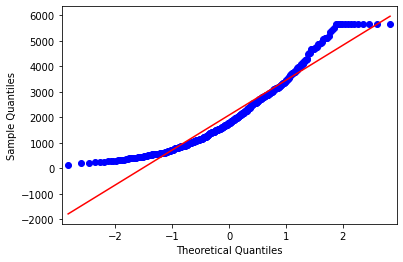

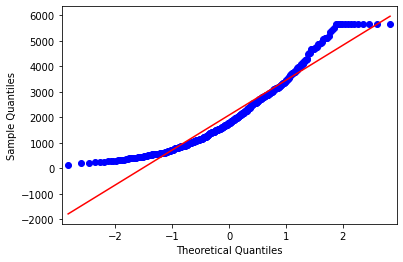

In [82]:
qqplot(market3["Item_Outlet_Sales"],line="s")

In [0]:
market3["Item_Outlet_Sales_sqr"]=np.sqrt(market3["Item_Outlet_Sales"])

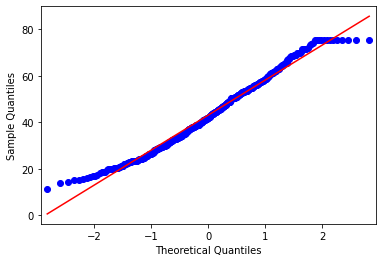

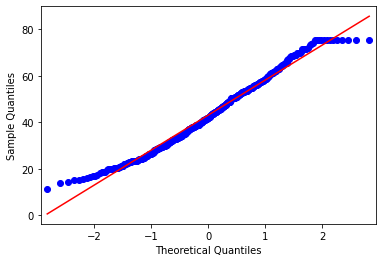

In [84]:
qqplot(market3["Item_Outlet_Sales_sqr"],line="s")

In [0]:
market4=market3.drop(["Item_Outlet_Sales"],axis=1)

In [0]:
market4["Item_Outlet_Sales"]=market4["Item_Outlet_Sales_sqr"]

In [0]:
market4.drop(["Item_Outlet_Sales_sqr"],axis=1,inplace=True)

In [88]:
market4.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Identifier_OUT017,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Outlet_Sales
48,15.850,0.121633,60.6220,1997.0,0,1,0,0,0,0,0,1,0,0,1,0,0,50.760674
71,15.850,0.121532,59.2220,1987.0,0,1,0,0,0,0,0,0,0,0,0,0,1,24.478971
106,10.500,0.116577,163.1210,1987.0,0,1,0,0,0,0,0,0,0,0,0,0,1,42.359544
107,6.635,0.000000,121.3098,2002.0,0,1,0,0,0,0,1,0,0,0,0,1,0,50.306121
179,11.100,0.160746,157.4604,2002.0,1,0,0,0,0,0,1,0,0,0,0,1,0,54.870280


In [89]:
market4.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Identifier_OUT017,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Outlet_Sales
Item_Weight,1.000000,0.049136,0.193022,0.032296,0.053463,-0.054883,-0.041425,0.045066,-0.015401,0.090744,-0.032899,-0.021764,0.005982,0.050620,-0.017159,0.030483,-0.024077,0.054257
Item_Visibility,0.049136,1.000000,-0.027694,0.043828,-0.039669,0.053051,-0.069744,0.078460,0.033351,0.020351,0.011805,-0.021744,-0.017777,0.053487,-0.032141,0.048793,-0.025578,-0.026961
Item_MRP,0.193022,-0.027694,1.000000,-0.026054,-0.069909,0.094514,-0.051319,-0.072212,-0.036820,-0.003395,0.047223,-0.011779,-0.020068,-0.002197,-0.040770,0.004762,0.024918,0.721138
Outlet_Establishment_Year,0.032296,0.043828,-0.026054,1.000000,-0.000384,-0.011629,0.037680,0.014550,0.545429,0.320414,0.188773,-0.162153,-0.016486,0.147507,0.343892,0.785710,-0.861917,-0.015363
Item_Fat_Content_Low Fat,0.053463,-0.039669,-0.069909,-0.000384,1.000000,-0.884761,-0.087772,-0.132445,-0.034196,0.032370,0.058784,0.011403,-0.072940,-0.053853,0.025890,0.041508,0.003381,-0.070964
Item_Fat_Content_Regular,-0.054883,0.053051,0.094514,-0.011629,-0.884761,1.000000,-0.095547,-0.144177,0.002311,-0.004635,-0.017014,-0.015777,0.021020,0.010403,-0.019229,-0.014264,0.014772,0.111358
Item_Fat_Content_low fat,-0.041425,-0.069744,-0.051319,0.037680,-0.087772,-0.095547,1.000000,-0.014303,0.020317,0.024024,-0.043172,0.018207,0.025580,0.003505,0.050979,0.000914,-0.044274,-0.019842
Item_Fat_Content_reg,0.045066,0.078460,-0.072212,0.014550,-0.132445,-0.144177,-0.014303,1.000000,0.063147,-0.064027,-0.065144,0.016814,0.072434,0.072687,-0.045534,-0.047593,-0.023490,-0.082115
Outlet_Identifier_OUT017,-0.015401,0.033351,-0.036820,0.545429,-0.034196,0.002311,0.020317,0.063147,1.000000,-0.198192,-0.201650,-0.211908,-0.194713,0.027394,-0.082790,0.459042,-0.206799,-0.009757
Outlet_Identifier_OUT035,0.090744,0.020351,-0.003395,0.320414,0.032370,-0.004635,0.024024,-0.064027,-0.198192,1.000000,-0.193258,-0.203089,-0.186609,-0.241382,0.446179,0.439937,-0.198192,-0.071929


In [0]:
def pairwise_cal(data,depdent_col):
    x_var=data.drop([depdent_col],axis=1)
    col=list(x_var.columns)
    for i in col:
        abc=abs(np.corrcoef(data[i],data[depdent_col])[0][1])
        if abc <0.05:
            data=data.drop(i,axis=1)
    return data
       
        

In [0]:
market5=pairwise_cal(data=market4,depdent_col="Item_Outlet_Sales")

In [92]:
print(list(market5.columns))

print(list(market4.columns))

['Item_Weight', 'Item_MRP', 'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular', 'Item_Fat_Content_reg', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT046', 'Item_Outlet_Sales']
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat', 'Item_Fat_Content_reg', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Item_Outlet_Sales']


In [0]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.copy()
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [94]:
vif_cal(input_data=market5,dependent_col="Item_Outlet_Sales")

Item_Weight  VIF =  1.07
Item_MRP  VIF =  2.21
Item_Fat_Content_Low Fat  VIF =  6.78
Item_Fat_Content_Regular  VIF =  6.81
Item_Fat_Content_reg  VIF =  1.51
Outlet_Identifier_OUT035  VIF =  1.06
Outlet_Identifier_OUT046  VIF =  1.05
Item_Outlet_Sales  VIF =  2.16


In [0]:
market5.drop(["Item_Fat_Content_Regular"],axis=1,inplace=True)

In [96]:
vif_cal(input_data=market5,dependent_col="Item_Outlet_Sales")

Item_Weight  VIF =  1.07
Item_MRP  VIF =  2.21
Item_Fat_Content_Low Fat  VIF =  1.03
Item_Fat_Content_reg  VIF =  1.04
Outlet_Identifier_OUT035  VIF =  1.06
Outlet_Identifier_OUT046  VIF =  1.05
Item_Outlet_Sales  VIF =  2.15


In [97]:
list(market5.columns)

['Item_Weight',
 'Item_MRP',
 'Item_Fat_Content_Low Fat',
 'Item_Fat_Content_reg',
 'Outlet_Identifier_OUT035',
 'Outlet_Identifier_OUT046',
 'Item_Outlet_Sales']

In [0]:
market5["Item_Fat_Content_Low_Fat"]= market5["Item_Fat_Content_Low Fat"]
market5.drop(["Item_Fat_Content_Low Fat"],axis=1,inplace=True)


In [99]:
market5.head()

,Item_Weight,Item_MRP,Item_Fat_Content_reg,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Item_Outlet_Sales,Item_Fat_Content_Low_Fat
48,15.850,60.6220,0,0,1,50.760674,0
71,15.850,59.2220,0,0,0,24.478971,0
106,10.500,163.1210,0,0,0,42.359544,0
107,6.635,121.3098,0,0,0,50.306121,0
179,11.100,157.4604,0,0,0,54.870280,1


In [100]:
import statsmodels.formula.api as sm
model=sm.ols(formula="Item_Outlet_Sales~Item_Weight+Item_MRP",data=market5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     236.2
Date:                Fri, 22 May 2020   Prob (F-statistic):           1.35e-69
Time:                        18:26:54   Log-Likelihood:                -1598.6
No. Observations:                 426   AIC:                             3203.
Df Residuals:                     423   BIC:                             3215.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      22.7872      1.616     14.105      0.000      19.612      25.963
Item_Weight    -0.2760      0.107     -2.590      0.010      -0.486      -0.067
Item_MRP        0.1881      0.009     21.672      0.000       0.171       0.205
==============================================================================
Omnibus:                        4.553   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                4.393
Skew:                          -0.246   Prob(JB):                        0.111
Kurtosis:                       3.077   Cond. No.                         450.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(market5[["Item_Weight","Item_MRP"]],market5[["Item_Outlet_Sales"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
lr.score(market5[["Item_Weight","Item_MRP"]],market5[["Item_Outlet_Sales"]])

0.5275343247964914

In [0]:
market5["pred"]=lr.predict(market5[["Item_Weight","Item_MRP"]])

In [104]:
market5.head()

,Item_Weight,Item_MRP,Item_Fat_Content_reg,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Item_Outlet_Sales,Item_Fat_Content_Low_Fat,pred
48,15.850,60.6220,0,0,1,50.760674,0,29.816058
71,15.850,59.2220,0,0,0,24.478971,0,29.552691
106,10.500,163.1210,0,0,0,42.359544,0,50.574908
107,6.635,121.3098,0,0,0,50.306121,0,43.776318
179,11.100,157.4604,0,0,0,54.870280,1,49.344415


In [0]:
market5["Item_Outlet_Sales_sqr"]=np.square(market5["Item_Outlet_Sales"])


In [106]:
market5["pred_sqr"]= np.square(market5["pred"])
market5.shape

(426, 10)

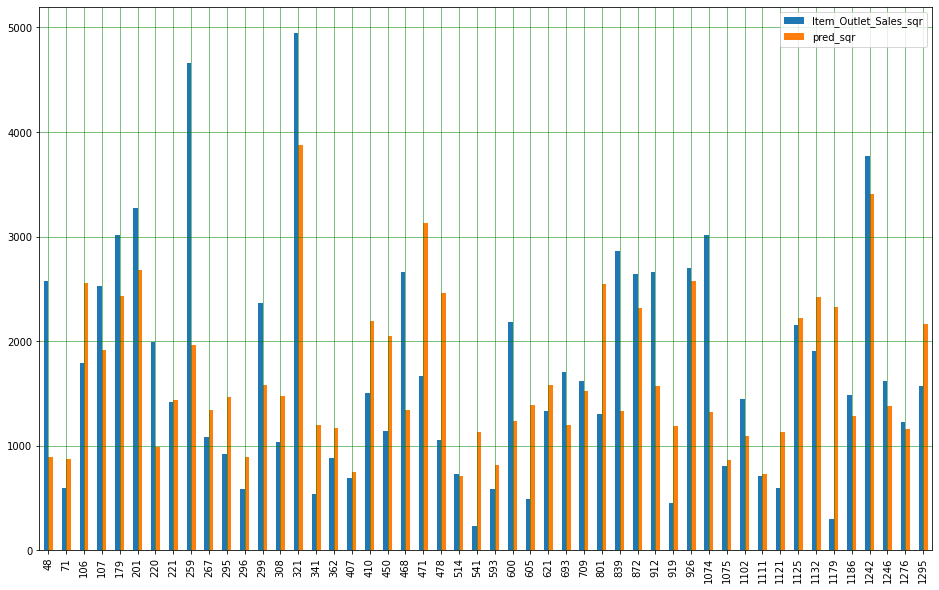

In [107]:
market6=market5[["Item_Outlet_Sales_sqr","pred_sqr"]]
market7 = market6.head(50)
market7.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
downloaded1 = drive.CreateFile({'id':"1lwSNPGZT6aNQiMF_dMBgBBdrPQyJA_vB"})
downloaded1.GetContentFile('test.csv')

In [0]:
market_test=pd.read_csv('test.csv')

In [110]:
market_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [111]:
market_test1=market_test[(market_test["Item_Type"]=="Baking Goods" ) & (market_test["Outlet_Type"]=="Supermarket Type1")]
market_test1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1
15,FDM24,6.135,Regular,0.079451,Baking Goods,151.6366,OUT049,1999,Medium,Tier 1,Supermarket Type1
60,FDW12,8.315,Regular,0.035565,Baking Goods,144.8444,OUT035,2004,Small,Tier 2,Supermarket Type1
98,FDZ36,6.035,Regular,0.065917,Baking Goods,185.7240,OUT045,2002,NaN,Tier 2,Supermarket Type1
101,FDK60,16.500,Regular,0.094395,Baking Goods,97.2068,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [112]:
market_test1.shape

(283, 11)

In [113]:
market_test2=market_test1[["Item_Weight","Item_MRP"]]
market_test2.head()

,Item_Weight,Item_MRP
9,5.985,186.8924
15,6.135,151.6366
60,8.315,144.8444
98,6.035,185.7240
101,16.500,97.2068


In [114]:
market_test2["pred"]=lr.predict(market_test2[["Item_Weight","Item_MRP"]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
market_test2["pred_sqr"]=np.square(market_test2["pred"])
market_test2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Item_Weight,Item_MRP,pred,pred_sqr
9,5.985,186.8924,56.293090,3168.912030
15,6.135,151.6366,49.619392,2462.084032
60,8.315,144.8444,47.739879,2279.096009
98,6.035,185.7240,56.059490,3142.666408
101,16.500,97.2068,36.518934,1333.632559


In [0]:
#Gradient Decent

In [0]:
from sklearn.metrics import mean_squared_error

In [118]:
print("train_MSE",mean_squared_error(market5[["Item_Outlet_Sales"]],market5[["pred"]]))

train_MSE 106.40879137103074


In [119]:
print("train_RMSE",np.sqrt(mean_squared_error(market5[["Item_Outlet_Sales"]],market5[["pred"]])))

train_RMSE 10.315463701212405


In [120]:
import warnings
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=2, input_dim=2)) # input layer
    regressor.add(Dense(units=1)) # output layer
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

Using TensorFlow backend.


In [0]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, epochs=100)


In [122]:
x_train=market5[["Item_Weight","Item_MRP"]]
y_train=market5[["Item_Outlet_Sales"]]
print(x_train.head())
print(y_train.head())

     Item_Weight  Item_MRP
48        15.850   60.6220
71        15.850   59.2220
106       10.500  163.1210
107        6.635  121.3098
179       11.100  157.4604
     Item_Outlet_Sales
48           50.760674
71           24.478971
106          42.359544
107          50.306121
179          54.870280


In [123]:
results=regressor.fit(x_train,y_train)

Epoch 1/100
426/426 [==============================] - 0s 688us/step - loss: 888.1008 - mae: 23.3542 - accuracy: 0.0000e+00
Epoch 2/100
426/426 [==============================] - 0s 45us/step - loss: 694.1948 - mae: 20.2808 - accuracy: 0.0000e+00
Epoch 3/100
426/426 [==============================] - 0s 41us/step - loss: 537.2523 - mae: 17.6128 - accuracy: 0.0000e+00
Epoch 4/100
426/426 [==============================] - 0s 42us/step - loss: 424.4297 - mae: 15.5145 - accuracy: 0.0000e+00
Epoch 5/100
426/426 [==============================] - 0s 43us/step - loss: 342.0236 - mae: 13.8963 - accuracy: 0.0000e+00
Epoch 6/100
426/426 [==============================] - 0s 54us/step - loss: 284.6620 - mae: 12.6970 - accuracy: 0.0000e+00
Epoch 7/100
426/426 [==============================] - 0s 42us/step - loss: 242.9248 - mae: 11.7875 - accuracy: 0.0000e+00
Epoch 8/100
426/426 [==============================] - 0s 42us/step - loss: 215.3828 - mae: 11.2222 - accuracy: 0.0000e+00
Epoch 9/100
426

In [124]:
regressor.model

In [0]:
market5["gd_pred"]= regressor.predict(x_train)

In [126]:
mean_squared_error(market5[["Item_Outlet_Sales"]],market5[["gd_pred"]])

154.85308763103055

In [127]:
print("train_RMSE",np.sqrt(mean_squared_error(market5[["Item_Outlet_Sales"]],market5[["gd_pred"]])))

train_RMSE 12.443998056534344
